In [1]:
import tensorflow as tf
import os

In [2]:
tf.__version__

'2.5.0-dev20201118'

In [4]:
!mkdir test_model

In [ ]:
%cd test_model

In [72]:
!pwd

/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model


In [73]:
# Download Tensorflow Object Detection API
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 103, done.
remote: Counting objects: 100% (103/103), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 47437 (delta 39), reused 65 (delta 1), pack-reused 47334
Receiving objects: 100% (47437/47437), 551.86 MiB | 6.27 MiB/s, done.
Resolving deltas: 100% (32627/32627), done.


In [3]:
# Setup APIS
%cd models/research/
!protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install . --use-feature=2020-resolver
%cd ../../
!pwd

/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/models/research
Processing /home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/models/research
Processing /home/yousungchoi/.cache/pip/wheels/46/b3/dd/1206abf6be55c4406fd044a99a6b0ce5f12138cb44648b37ad/avro_python3-1.10.0-py3-none-any.whl
  Using cached apache_beam-2.25.0-cp37-cp37m-manylinux2010_x86_64.whl (8.7 MB)
Processing /home/yousungchoi/.cache/pip/wheels/bc/49/5f/fdb5b9d85055c478213e0158ac122b596816149a02d82e0ab1/avro_python3-1.9.2.1-py3-none-any.whl
  Using cached Pillow-8.0.1-cp37-cp37m-manylinux1_x86_64.whl (2.2 MB)
  Using cached lxml-4.6.1-cp37-cp37m-manylinux1_x86_64.whl (5.5 MB)
  Using cached matplotlib-3.3.3-cp37-cp37m-manylinux1_x86_64.whl (11.6 MB)
  Using cached Cython-0.29.21-cp37-cp37m-manylinux1_x86_64.whl (2.0 MB)
  Using cached contextlib2-0.6.0.post1-py2.py3-none-any.whl (9.8 kB)
  Using cached tf_slim-1.1.0-py2.py3-none-any.whl (352 kB)
Processing

  Using cached pydot-1.4.1-py2.py3-none-any.whl (19 kB)
Processing /home/yousungchoi/.cache/pip/wheels/dc/9a/e9/49e627353476cec8484343c4ab656f1e0d783ee77b9dde2d1f/crcmod-1.7-cp37-cp37m-linux_x86_64.whl
  Using cached pytz-2020.4-py2.py3-none-any.whl (509 kB)
  Using cached kiwisolver-1.3.1-cp37-cp37m-manylinux1_x86_64.whl (1.1 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached opencv_python-4.4.0.46-cp37-cp37m-manylinux2014_x86_64.whl (49.5 MB)
  Using cached tensorflow_addons-0.11.2-cp37-cp37m-manylinux2010_x86_64.whl (1.1 MB)
     |████████████████████████████████| 61 kB 6.2 kB/s eta 0:00:011
  Using cached tensorflow_model_optimization-0.5.0-py2.py3-none-any.whl (172 kB)
Processing /home/yousungchoi/.cache/pip/wheels/09/25/76/1bbe8ad0c423e8655942b6d3c781f58e0ea2791bf8ee8985b3/kaggle-1.5.9-py3-none-any.whl
  Using cached tensorflow_datasets-4.1.0-py3-none-any.whl (3.6 MB)
Processing /home/yousungchoi/.cache/pip/wheels/d7/59/0d/58c5e576d9192261fa3da00466eebe

  Using cached numpy-1.18.5-cp37-cp37m-manylinux1_x86_64.whl (20.1 MB)
  Using cached google_cloud_bigquery-2.4.0-py2.py3-none-any.whl (210 kB)
  Using cached gin_config-0.3.0-py3-none-any.whl (44 kB)
Processing /home/yousungchoi/.cache/pip/wheels/f0/4b/57/d037639271e326da3e80e0ddc37bd3d5da7bbf48b3173be557/psutil-5.7.3-cp37-cp37m-linux_x86_64.whl
  Using cached dataclasses-0.6-py3-none-any.whl (14 kB)
  Using cached opencv_python_headless-4.4.0.46-cp37-cp37m-manylinux2014_x86_64.whl (36.7 MB)
Processing /home/yousungchoi/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653/PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl
  Using cached sentencepiece-0.1.94-cp37-cp37m-manylinux2014_x86_64.whl (1.1 MB)
  Using cached pbr-5.5.1-py2.py3-none-any.whl (106 kB)
Processing /home/yousungchoi/.cache/pip/wheels/72/b0/3f/1d95f96ff986c7dfffe46ce2be4062f38ebd04b506c77c81b9/docopt-0.6.2-py2.py3-none-any.whl
  Using cached typeguard-2.10.0-py3-none-any.whl (16 kB)
  Using cached urite

  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
Processing /home/yousungchoi/.cache/pip/wheels/72/ef/7a/125c4136cac83e9cb30d76c83449fffb557095eeb5d8dfa831/proto_plus-1.11.0-py3-none-any.whl
  Using cached google_cloud_core-1.4.3-py2.py3-none-any.whl (27 kB)
  Using cached google_resumable_media-1.1.0-py2.py3-none-any.whl (75 kB)
  Using cached googleapis_common_protos-1.52.0-py2.py3-none-any.whl (100 kB)
  Using cached text_unidecode-1.3-py2.py3-none-any.whl (78 kB)
  Using cached google_crc32c-1.0.0-cp37-cp37m-manylinux2010_x86_64.whl (39 kB)
  Created wheel for object-detection: filename=object_detection-0.1-py3-none-any.whl size=1595927 sha256=7998f86978f071334f6c9392c95a905479987f5fc9d51115b6569022db690526
  Stored in directory: /tmp/pip-ephem-wheel-cache-pd3g7c32/wheels/a3/f2/ef/4d1245afeec706756da8e888d70678875d2d75eaddc51eebf8
Successfully built object-detection
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.4
    Uninstalling n

In [75]:
# test for enviroment is clear, should say ok at the bottom for all test 
!CUDA_VISIBLE_DEVICES=1 python models/research/object_detection/model_lib_tf2_test.py

2020-11-18 12:51:40.838124: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2020-11-18 12:51:40.838162: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.9: /home/yousungchoi/anaconda3/envs/tfnightly_1116/bin/python
[ RUN      ] CheckpointV2Test.test_restore_map_incompatible_error
2020-11-18 12:51:41.784664: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-18 12:51:41.793628: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-18 12:51

Instructions for updating:
Use `tf.cast` instead.
W1118 12:51:48.896998 140695230060352 deprecation.py:323] From /home/yousungchoi/anaconda3/envs/tfnightly_1116/lib/python3.7/site-packages/object_detection/inputs.py:281: to_float (from tensorflow.python.ops.math_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
W1118 12:51:50.582848 140695230060352 deprecation.py:323] From /home/yousungchoi/anaconda3/envs/tfnightly_1116/lib/python3.7/site-packages/object_detection/model_lib_v2.py:348: set_learning_phase (from tensorflow.python.keras.backend) is deprecated and will be removed after 2020-10-11.
Instructions for updating:
Simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
INFO:tensorflow:time(__main__.CheckpointV2Test.test_restore_map_incompat

INFO:tensorflow:Reading unweighted datasets: ['models/research/object_detection/test_data/pets_examples.record']
I1118 12:52:58.574706 140695230060352 dataset_builder.py:148] Reading unweighted datasets: ['models/research/object_detection/test_data/pets_examples.record']
INFO:tensorflow:Reading record datasets for input file: ['models/research/object_detection/test_data/pets_examples.record']
I1118 12:52:58.575078 140695230060352 dataset_builder.py:77] Reading record datasets for input file: ['models/research/object_detection/test_data/pets_examples.record']
INFO:tensorflow:Number of filenames to read: 1
I1118 12:52:58.575131 140695230060352 dataset_builder.py:78] Number of filenames to read: 1
W1118 12:52:58.575216 140695230060352 dataset_builder.py:86] num_readers has been reduced to 1 to match input file shards.
INFO:tensorflow:depth of additional conv before box predictor: 0
I1118 12:53:01.956284 140689933317888 convolutional_keras_box_predictor.py:154] depth of additional conv bef

W1118 12:53:28.231754 140695230060352 model_lib_v2.py:1012] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting train_input_path: models/research/object_detection/test_data/pets_examples.record
I1118 12:53:28.231875 140695230060352 config_util.py:552] Maybe overwriting train_input_path: models/research/object_detection/test_data/pets_examples.record
INFO:tensorflow:Maybe overwriting eval_input_path: models/research/object_detection/test_data/pets_examples.record
I1118 12:53:28.231929 140695230060352 config_util.py:552] Maybe overwriting eval_input_path: models/research/object_detection/test_data/pets_examples.record
INFO:tensorflow:Maybe overwriting label_map_path: models/research/object_detection/data/pet_label_map.pbtxt
I1118 12:53:28.231974 140695230060352 config_util.py:552] Maybe overwriting label_map_path: models/research/object_detection/data/pet_label_map.pbtxt
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: 1
I1118 12:53:2

DONE (t=0.02s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.000
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar

In [76]:
# test for enviroment is clear, should say ok at the bottom for all test 
!CUDA_VISIBLE_DEVICES=1 python models/research/object_detection/exporter_lib_tf2_test.py

2020-11-18 12:53:54.619284: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2020-11-18 12:53:54.619306: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.7.9: /home/yousungchoi/anaconda3/envs/tfnightly_1116/bin/python
[ RUN      ] ExportInferenceGraphTest.test_export_checkpoint_and_run_inference_with_image
2020-11-18 12:53:55.671297: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-18 12:53:55.679950: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA no

W1118 12:53:56.246489 140070184630080 save_impl.py:78] Skipping full serialization of Keras layer <__main__.FakeModel object at 0x7f642c6f9750>, because it is not built.
INFO:tensorflow:Assets written to: /tmp/exporter_lib_tf2_testjbhldaf0/tmphbzrvx8z/output/saved_model/assets
I1118 12:53:56.297231 140070184630080 builder_impl.py:775] Assets written to: /tmp/exporter_lib_tf2_testjbhldaf0/tmphbzrvx8z/output/saved_model/assets
INFO:tensorflow:Writing pipeline config file to /tmp/exporter_lib_tf2_testjbhldaf0/tmphbzrvx8z/output/pipeline.config
I1118 12:53:56.299891 140070184630080 config_util.py:254] Writing pipeline config file to /tmp/exporter_lib_tf2_testjbhldaf0/tmphbzrvx8z/output/pipeline.config
INFO:tensorflow:time(__main__.ExportInferenceGraphTest.test_export_saved_model_and_run_inference1 (input_type='encoded_image_string_tensor')): 0.27s
I1118 12:53:56.376723 140070184630080 test_util.py:1973] time(__main__.ExportInferenceGraphTest.test_export_saved_model_and_run_inference1 (inpu

W1118 12:53:57.928579 140070184630080 save_impl.py:78] Skipping full serialization of Keras layer <__main__.FakeModel object at 0x7f642c1dee10>, because it is not built.
INFO:tensorflow:Assets written to: /tmp/exporter_lib_tf2_testjbhldaf0/tmpbn34kboo/output/saved_model/assets
I1118 12:53:57.974524 140070184630080 builder_impl.py:775] Assets written to: /tmp/exporter_lib_tf2_testjbhldaf0/tmpbn34kboo/output/saved_model/assets
INFO:tensorflow:Writing pipeline config file to /tmp/exporter_lib_tf2_testjbhldaf0/tmpbn34kboo/output/pipeline.config
I1118 12:53:57.976259 140070184630080 config_util.py:254] Writing pipeline config file to /tmp/exporter_lib_tf2_testjbhldaf0/tmpbn34kboo/output/pipeline.config
INFO:tensorflow:time(__main__.ExportInferenceGraphTest.test_export_yields_correct_directory_structure0 (input_type='image_tensor')): 0.08s
I1118 12:53:57.976469 140070184630080 test_util.py:1973] time(__main__.ExportInferenceGraphTest.test_export_yields_correct_directory_structure0 (input_typ

In [4]:
%env ROOT_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project
%env MODEL_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model
%env BUILD_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/models/research/object_detection

env: ROOT_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project
env: MODEL_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model
env: BUILD_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/models/research/object_detection


In [59]:
%%bash
cd $MODEL_PATH
wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
tar -xvf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
rm -rf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz

ssd_mobilenet_v2_320x320_coco17_tpu-8/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/checkpoint
ssd_mobilenet_v2_320x320_coco17_tpu-8/checkpoint/ckpt-0.index
ssd_mobilenet_v2_320x320_coco17_tpu-8/pipeline.config
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/saved_model.pb
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.data-00000-of-00001
ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model/variables/variables.index


--2020-11-18 12:36:41--  http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 216.58.199.240, 2404:6800:400a:80b::2010
Connecting to download.tensorflow.org (download.tensorflow.org)|216.58.199.240|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46042990 (44M) [application/x-tar]
Saving to: ‘ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz’

     0K .......... .......... .......... .......... ..........  0%  443K 1m41s
    50K .......... .......... .......... .......... ..........  0% 1.30M 68s
   100K .......... .......... .......... .......... ..........  0% 1.77M 53s
   150K .......... .......... .......... .......... ..........  0% 2.17M 45s
   200K .......... .......... .......... .......... ..........  0% 3.75M 38s
   250K .......... .......... .......... .......... ..........  0% 4.37M 33s
   300K .......... .......... .......... .......

In [5]:
%env MODEL_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/ssd_mobilenet_v2_320x320_coco17_tpu-8

env: MODEL_PATH=/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/ssd_mobilenet_v2_320x320_coco17_tpu-8


In [68]:
%%bash
echo $MODEL_PATH"saved_model"
TEST_IR=$MODEL_PATH
echo $TEST_IR

/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/ssd_mobilenet_v2_320x320_coco17_tpu-8/saved_model
/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/ssd_mobilenet_v2_320x320_coco17_tpu-8/


In [8]:
%%bash

start=`date +%s`
PIPELINE_CONFIG_PATH=$MODEL_PATH"/pipeline.config"
MODEL_DIR=$MODEL_PATH"/checkpoint"
OUTPUT_DIR=$MODEL_PATH"/exported_tflite"
NUM_TRAIN_STEPS=1000
SAMPLE_1_OF_N_EVAL_EXAMPLES=1
CUDA_VISIBLE_DEVICES=1 python $BUILD_PATH/export_tflite_graph_tf2.py \
    --pipeline_config_path=${PIPELINE_CONFIG_PATH} \
    --trained_checkpoint_dir=${MODEL_DIR} \
    --output_directory=${OUTPUT_DIR}
    
end=`date +%s`
runtime=$((end-start))
echo $runtime

# Export graph for tflite (frozen graph)
# this is upto https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/running_on_mobile_tf2.md


24


2020-11-19 08:02:55.533243: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'libcudart.so.10.1'; dlerror: libcudart.so.10.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/usr/local/cuda/lib64:/usr/local/cuda/extras/CUPTI/lib64
2020-11-19 08:02:55.533264: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2020-11-19 08:02:56.438139: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-11-19 08:02:56.446640: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-11-19 08:02:56.447136: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:02:00.0 name: GeForce RTX 2080 Ti computeC

In [6]:
import tensorflow as tf

saved_model_dir = "/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/exported-models/3rd_trial/exported_for_tflite"
image_dir = "/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train"
# A generator that provides a representative dataset

dataset_list = tf.data.Dataset.list_files(image_dir + "/*.jpg")

i = 0
for f in dataset_list.take(len(dataset_list)):
    print(i, " ", f)
    i += 1
    

0   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train/0020_leashed_dog.jpg', shape=(), dtype=string)
1   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train/1089_leashed_dog.jpg', shape=(), dtype=string)
2   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train/0154_muzzled_dog.jpg', shape=(), dtype=string)
3   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train/0023_muzzled_dog.jpg', shape=(), dtype=string)
4   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train/0007_muzzled_dog.jpg', shape=(), dtype=string)
5   tf.Tensor(b'/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Am

AttributeError: module 'tensorflow.lite.python.optimize._pywrap_tensorflow_lite_calibration_wrapper' has no attribute 'AddIntermediateTensors'

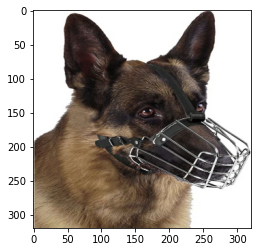

In [9]:
import matplotlib.pyplot as plt

saved_model_dir = "/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/test_model/ssd_mobilenet_v2_320x320_coco17_tpu-8/exported_tflite/saved_model"
image_dir = "/home/yousungchoi/classes/1_Ambient_computing/99_project/2_pretest_Ambient_project/workspace/training_demo/images/train"
# A generator that provides a representative dataset

dataset_list = tf.data.Dataset.list_files(image_dir + "/*.jpg")
image = next(iter(dataset_list))
image = tf.io.read_file(image)
image = tf.io.decode_jpeg(image, channels=3)
image = tf.image.resize(image, [320, 320])
image = tf.cast(image / 255., tf.float32)
plt.imshow(image)

def representative_data_gen():
  dataset_list = tf.data.Dataset.list_files(image_dir + "/*.jpg")
#   for i in range(len(dataset_list)):
  for i in range(100):
    image = next(iter(dataset_list))
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [320, 320])
    image = tf.cast(image / 255., tf.float32)
    image = tf.expand_dims(image, 0)
    yield [image]

converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# converter.experimental_new_converter = True
# This enables quantization
converter.optimizations = [tf.lite.Optimize.DEFAULT]
# This sets the representative dataset for quantization
converter.representative_dataset = representative_data_gen
# This ensures that if any ops can't be quantized, the converter throws an error
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8, tf.lite.OpsSet.TFLITE_BUILTINS]
# For full integer quantization, though supported types defaults to int8 only, we explicitly declare it for clarity.
converter.target_spec.supported_types = [tf.int8]
# These set the input and output tensors to uint8 (added in r2.3)
converter.inference_input_type = tf.uint8
converter.inference_output_type = tf.uint8
tflite_model = converter.convert()

with open(saved_model_dir + "/ssd_test.tflite", "wb") as f:
  f.write(tflite_model)
# https://github.com/tensorflow/tensorflow/issues/44882 - doens't work at tfnightly